In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
%matplotlib inline 

In [27]:
df=pd.read_csv("FedCycleData071012-2.csv", usecols=['CycleNumber','LengthofCycle'],nrows=40)

In [28]:
print(df)

    CycleNumber  LengthofCycle
0             1             29
1             2             27
2             3             29
3             4             27
4             5             28
5             6             26
6             7             29
7             8             24
8             9             28
9            10             28
10           11             26
11           12             29
12           13             27
13           14             28
14           15             30
15           16             28
16           17             26
17           18             26
18           19             24
19           20             27
20           21             28
21           22             26
22           23             27
23           24             27
24           25             25
25           26             32
26           27             27
27           28             29
28           29             26
29           30             27
30           31             28
31      

In [29]:
df.columns=["Month","Cyclelength"]

In [30]:
df.head()

,Month,Cyclelength
0,1,29
1,2,27
2,3,29
3,4,27
4,5,28


In [31]:
df.set_index('Month',inplace=True)

In [32]:
df.head()

,Cyclelength
Month,
1,29
2,27
3,29
4,27
5,28


In [33]:
df.describe()


,Cyclelength
count,40.000000
mean,27.350000
std,1.702939
min,24.000000
25%,26.000000
50%,27.000000
75%,28.000000
max,32.000000


<AxesSubplot:xlabel='Month'>

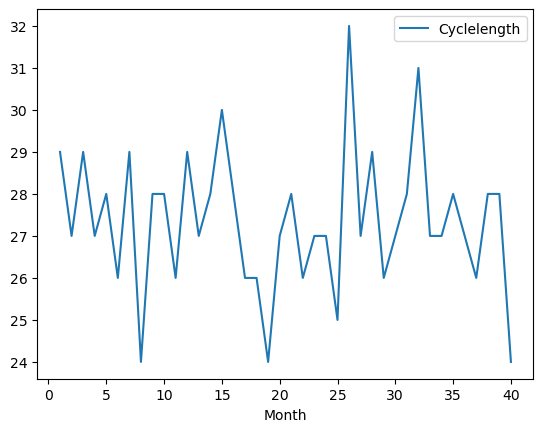

In [34]:
df.plot()


In [35]:
# checking the data is stationarity
from statsmodels.tsa.stattools import adfuller

In [36]:
# test_result=adfuller(df['Cyclelength'])

In [37]:
# #Ho: It is non stationary
# #H1: It is stationary

# def adfuller_test(Cyclelength):
#     result=adfuller(Cyclelength)
#     labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
#     for value,label in zip(result,labels):
#         print(label+' : '+str(value) )
#     if result[1] <= 0.05:
#         print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
#     else:
#         print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [38]:
# adfuller_test(df['Cyclelength'])

In [39]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
# Create a new column with the differences between consecutive data points
# df['Cyclelength Diff'] = df['Cyclelength'].diff()

In [41]:
def check_stationary (timeseries):
    result=adfuller(timeseries)
    p_value=result[1]
    return p_value

In [47]:
df['diff']=df['Cyclelength']

In [48]:
p_value=check_stationary(df['Cyclelength'])

In [52]:
d=0

In [54]:
while p_value >0.05:
    df['diff'] =df['Cyclelength']-df['Cyclelength'].shift(1)
    df=df.dropna()
    p_value=check_stationary(df['diff'])
    d=d+1

In [50]:
print("data is stationary after transformation ,p-value",p_value)

data is stationary after transformation ,p-value 1.5340595508116815e-10


<AxesSubplot:xlabel='Month'>

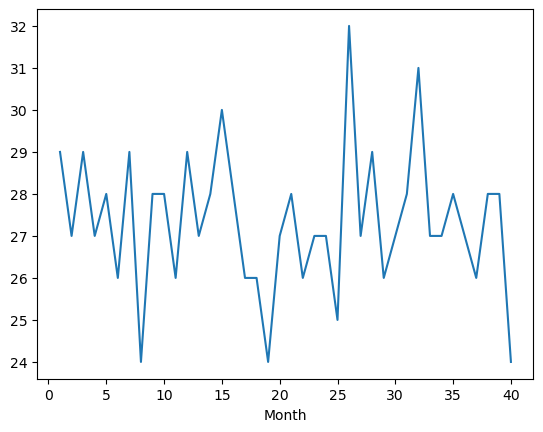

In [56]:
df['diff'].plot()

In [58]:
import random
#for random search method

In [65]:
#vayena

def find_optimal_arima(data):
    best_aic = float("inf")
    best_pdq = None
    best_model = None
    for i in range(50):
        p = random.randint(0,5)
        q = random.randint(0,5)
        try:
            model = ARIMA(data, order=(p, 0, q))
            results = model.fit(disp=0)
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = (p, 0, q)
                best_model = results
        except:
            continue
    print('Best ARIMA model: ARIMA{} - AIC:{}'.format(best_pdq, best_aic))
    return best_pdq, best_model


In [66]:
data=df['diff']

In [67]:
best_pdq,best_model=find_optimal_arima(data)

Best ARIMA model: ARIMANone - AIC:inf


In [69]:
print(best_pdq)


None
